In [3]:
import pandas as pd
import numpy as np

In [ ]:

def generate_user(is_bot):
    if is_bot:
        return {
            "mouse_avg_speed": np.random.normal(1000, 300),  # high
            "mouse_path_deviation": np.random.normal(0.1, 0.05),
            "hover_time_ms": np.random.normal(50, 20),  # very short
            "click_offset_x": np.random.normal(0, 1),
            "click_offset_y": np.random.normal(0, 1),
            "moved_before_submit": 0,

            "avg_keystroke_delay_ms": np.random.normal(30, 10),
            "backspace_count": np.random.randint(0, 2),
            "tab_key_count": np.random.randint(0, 2),
            "paste_detected": 1,

            "focus_switch_delay_avg_ms": np.random.normal(50, 20),
            "idle_time_ms": np.random.normal(0, 10),
            "delay_before_submit_ms": np.random.normal(200, 100),

            "is_webdriver": 1,
            "has_plugins": 0,
            "screen_res_mismatch": 1,
            "missing_headers_score": np.random.randint(1, 4),

            "honeypot_filled": 1,
            "unnatural_field_sequence": 1,

            "geo_ip_mismatch": 1,
            "request_too_fast": 1,
            "label": 1
        }
    else:
        return {
            "mouse_avg_speed": np.random.normal(300, 100),
            "mouse_path_deviation": np.random.normal(0.8, 0.2),
            "hover_time_ms": np.random.normal(1000, 300),
            "click_offset_x": np.random.normal(5, 2),
            "click_offset_y": np.random.normal(5, 2),
            "moved_before_submit": 1,

            "avg_keystroke_delay_ms": np.random.normal(200, 50),
            "backspace_count": np.random.randint(1, 5),
            "tab_key_count": np.random.randint(1, 4),
            "paste_detected": 0,

            "focus_switch_delay_avg_ms": np.random.normal(400, 100),
            "idle_time_ms": np.random.normal(1000, 500),
            "delay_before_submit_ms": np.random.normal(2000, 500),

            "is_webdriver": 0,
            "has_plugins": 1,
            "screen_res_mismatch": 0,
            "missing_headers_score": 0,

            "honeypot_filled": 0,
            "unnatural_field_sequence": 0,

            "geo_ip_mismatch": 0,
            "request_too_fast": 0,
            "label": 0
        }

n = 60000
data = [generate_user(i < 30000) for i in range(n)]
df = pd.DataFrame(data)
df.to_csv("bot_human_behavior.csv", index=False)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
df = pd.read_csv("bot_human_behavior.csv")
X = df.drop("label", axis=1)
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6016
           1       1.00      1.00      1.00      5984

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



In [ ]:
joblib.dump(model, "bot_detection_model.joblib")

['bot_detection_model.joblib']

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("bot_human_behavior.csv")

In [7]:
model = joblib.load("bot_detection_model.joblib")

In [8]:
X_test = df.drop("label", axis=1)
y_true = df["label"]

In [9]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_true, y_pred)
print("f\n✅ Model Accuracy: {accuracy:.2%}\n")
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [13]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("bot_human_behavior.csv")
df = df.dropna(subset=["label"])
df["label"] = df["label"].astype(int)

X_test = df.drop("label", axis=1)
y_true = df["label"]

model = joblib.load("bot_detection_model.joblib")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}\n")

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))



Model Accuracy: 100.00%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30000
           1       1.00      1.00      1.00     30000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Confusion Matrix:
[[30000     0]
 [    0 30000]]


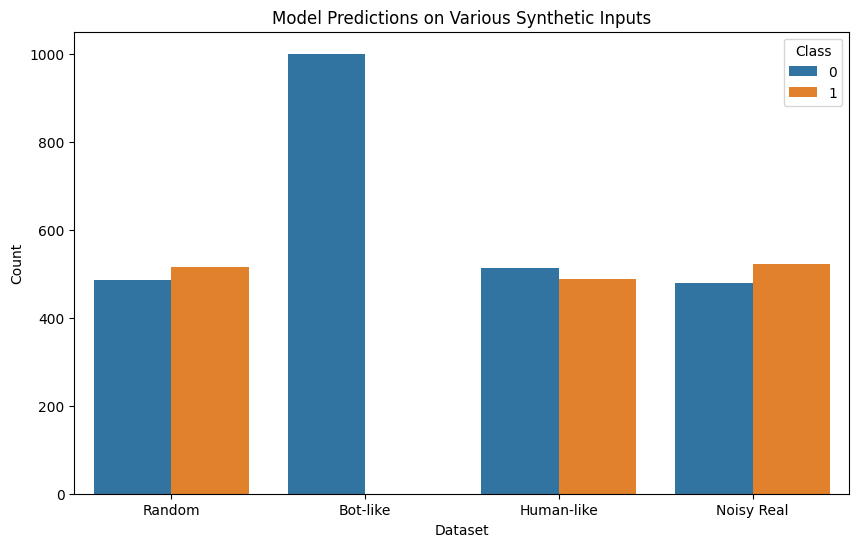

In [16]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bot_human_behavior.csv")
df = df.dropna(subset=["label"])
df["label"] = df["label"].astype(int)

X_test = df.drop("label", axis=1)
y_true = df["label"]
feature_names = X_test.columns

model = joblib.load("bot_detection_model.joblib")

# Random Data
random_df = pd.DataFrame(np.random.uniform(0, 1, size=(1000, len(feature_names))), columns=feature_names)
pred_random = model.predict(random_df)

# Bot-like Data
bot_like = np.zeros((1000, len(feature_names)))
bot_like[:, :3] = np.random.uniform(200, 500, (1000, 3))
bot_like_df = pd.DataFrame(bot_like, columns=feature_names)
pred_bot_like = model.predict(bot_like_df)

# Human-like Data
human_like = np.random.normal(0.5, 0.1, (1000, len(feature_names)))
human_like_df = pd.DataFrame(human_like, columns=feature_names)
pred_human_like = model.predict(human_like_df)

# Noisy Real Data
noisy_real = X_test.sample(1000).copy()
noisy_real += np.random.normal(0, 0.05, noisy_real.shape)
pred_noisy = model.predict(noisy_real)

# Combine Results
all_preds = {
    "Random": pred_random,
    "Bot-like": pred_bot_like,
    "Human-like": pred_human_like,
    "Noisy Real": pred_noisy
}

result_df = pd.DataFrame([
    {"Dataset": k, "Class": int(c), "Count": int(v)}
    for k, preds in all_preds.items()
    for c, v in zip(*np.unique(preds, return_counts=True))
])

plt.figure(figsize=(10, 6))
sns.barplot(data=result_df, x="Dataset", y="Count", hue="Class")
plt.title("Model Predictions on Various Synthetic Inputs")
plt.show()



📊 Random Dataset Predictions:
  Bot (0): 47.90%
  Human (1): 52.10%

📊 Bot-like Dataset Predictions:
  Bot (0): 100.00%

📊 Human-like Dataset Predictions:
  Bot (0): 52.70%
  Human (1): 47.30%

📊 Noisy Real Dataset Predictions:
  Bot (0): 53.10%
  Human (1): 46.90%


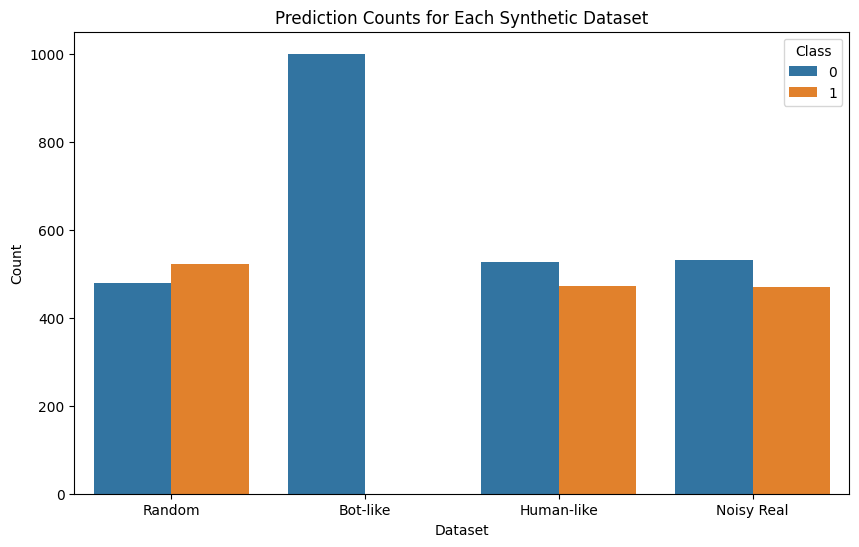

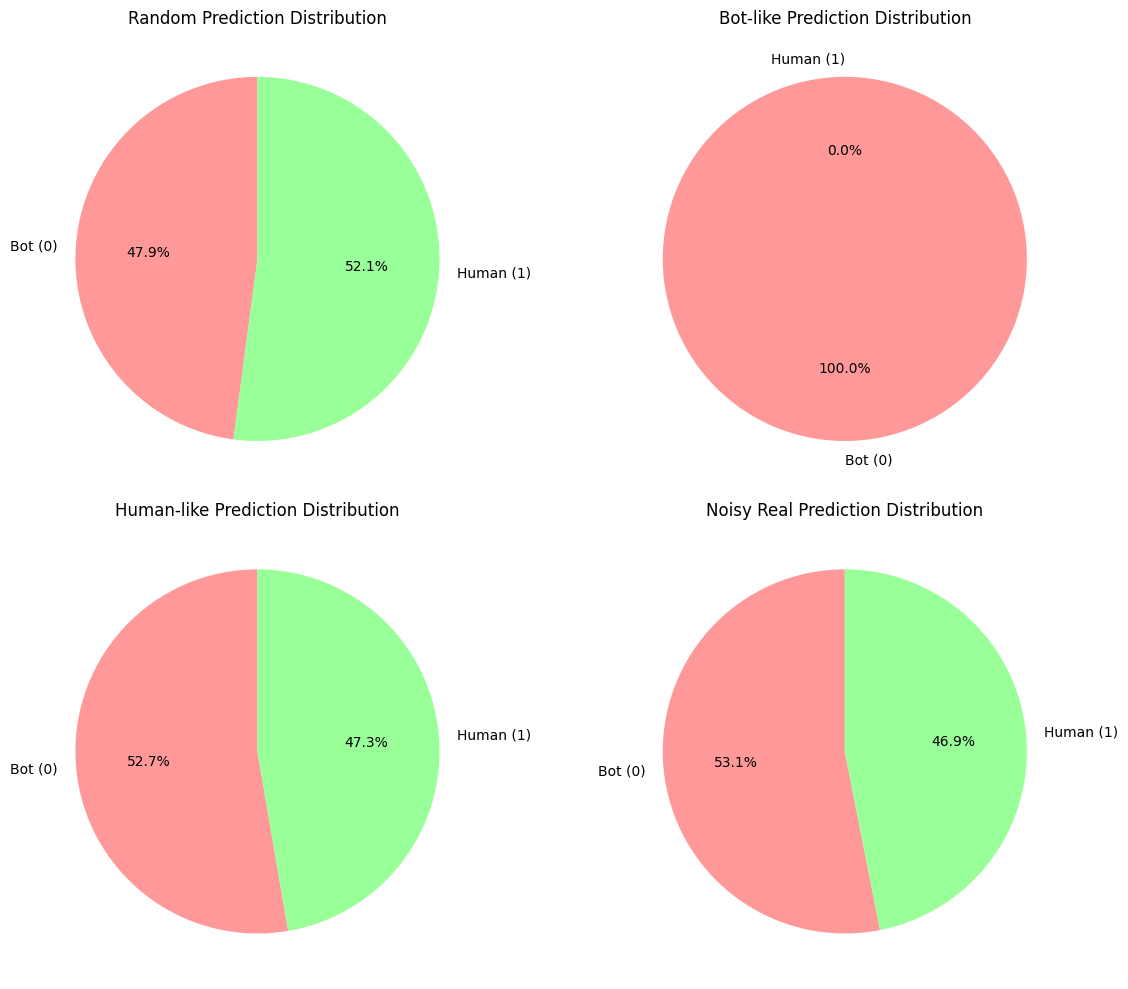

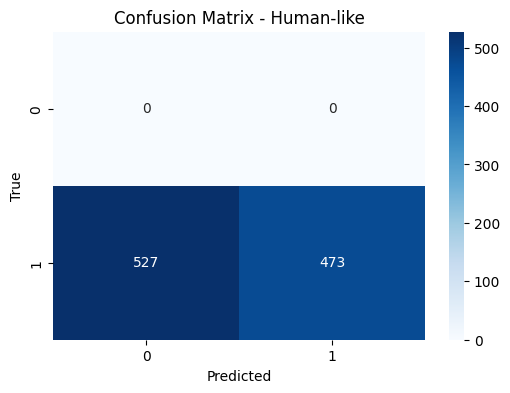

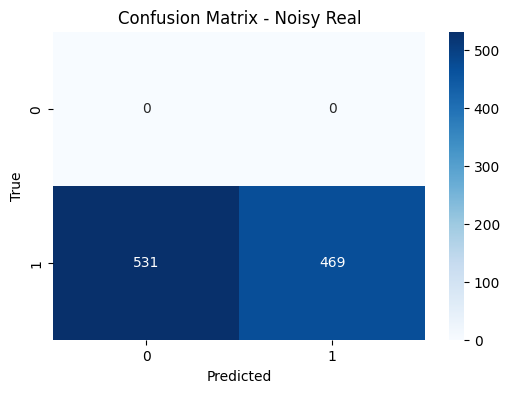

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix

df = pd.read_csv("bot_human_behavior.csv")
df = df.dropna(subset=["label"])
df["label"] = df["label"].astype(int)

X_test = df.drop("label", axis=1)
y_true = df["label"]
feature_names = X_test.columns

model = joblib.load("bot_detection_model.joblib")


random_df = pd.DataFrame(np.random.uniform(0, 1, size=(1000, len(feature_names))), columns=feature_names)
pred_random = model.predict(random_df)


bot_like = np.zeros((1000, len(feature_names)))
bot_like[:, :3] = np.random.uniform(200, 500, (1000, 3))
bot_like_df = pd.DataFrame(bot_like, columns=feature_names)
pred_bot_like = model.predict(bot_like_df)


human_like = np.random.normal(0.5, 0.1, (1000, len(feature_names)))
human_like_df = pd.DataFrame(human_like, columns=feature_names)
pred_human_like = model.predict(human_like_df)


noisy_real = X_test.sample(1000).copy()
noisy_real += np.random.normal(0, 0.05, noisy_real.shape)
pred_noisy = model.predict(noisy_real)


datasets = {
    "Random": pred_random,
    "Bot-like": pred_bot_like,
    "Human-like": pred_human_like,
    "Noisy Real": pred_noisy
}


for name, preds in datasets.items():
    unique, counts = np.unique(preds, return_counts=True)
    print(f"\n📊 {name} Dataset Predictions:")
    for u, c in zip(unique, counts):
        percent = (c / len(preds)) * 100
        label = "Human" if u == 1 else "Bot"
        print(f"  {label} ({u}): {percent:.2f}%")


result_df = pd.DataFrame([
    {"Dataset": k, "Class": int(c), "Count": int(v)}
    for k, preds in datasets.items()
    for c, v in zip(*np.unique(preds, return_counts=True))
])

plt.figure(figsize=(10, 6))
sns.barplot(data=result_df, x="Dataset", y="Count", hue="Class")
plt.title("Prediction Counts for Each Synthetic Dataset")
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, preds) in zip(axes.flatten(), datasets.items()):
    labels = ['Bot (0)', 'Human (1)']
    counts = [np.sum(preds == 0), np.sum(preds == 1)]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#ff9999","#99ff99"])
    ax.set_title(f"{name} Prediction Distribution")

plt.tight_layout()
plt.show()


for name, true_data, preds in [("Human-like", np.ones(1000), pred_human_like), ("Noisy Real", y_true[:1000], pred_noisy)]:
    cm = confusion_matrix(true_data, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
